In [499]:
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import datetime

from matplotlib import rc
rc('text', usetex=True)

In [2]:
def sr_to_datetime(sr):
    
    return sr.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d').date()) 

def date_to_season(datetime):

    if datetime.month in [1,2] or (datetime.month==3 and datetime.day<21):
        return 'winter'
    elif datetime.month in [4,5] or (datetime.month==3 and datetime.day<21):
        return 'spring'
    elif datetime.month in [7,8]:
        return 'summer'
    elif datetime.month in [10,11]:
        return 'autumn'
    elif datetime.month==3:
        if datetime.day<21:
            return 'winter'
        else:
            return 'spring'
    elif datetime.month==6:
        if datetime.day<21:
            return 'spring'
        else:
            return 'summer'
    elif datetime.month==9:
        if datetime.day<21:
            return 'summer'
        else:
            return 'autumn'
    elif datetime.month==12:
        if datetime.day<21:
            return 'autumn'
        else:
            return 'winter'
        
def sr_to_season(sr):
    
    return sr.apply(lambda x : date_to_season(x))

In [155]:
df_paris = (pd.read_csv('../data/data_paris_montsouris.csv',
                       names=['date', 'year', 'month', 'day', 't_min', 't_max', 'rain']
                      )
           .dropna()
           .astype({'year': 'int32', 'month': 'int32','day': 'int32','t_min':np.float, 't_max':np.float, 'rain':np.float})
           .assign(
               date = lambda x : sr_to_datetime(x['date']),
               season = lambda x : sr_to_season(x['date']),
               decade = lambda x : 10*(x['year']//10),
               t_moy = lambda x : (x['t_min'] + x['t_max'])/2
           )
           .set_index('date')
          )

df_paris.sample(10)

,year,month,day,t_min,t_max,rain,season,decade,t_moy
date,,,,,,,,,
2018-09-12,2018,9,12,16.1,27.4,0.4,summer,2010,21.75
1935-09-18,1935,9,18,10.1,19.0,1.7,summer,1930,14.55
2003-12-15,2003,12,15,3.5,7.5,0.0,autumn,2000,5.50
2012-10-13,2012,10,13,8.8,12.3,8.0,autumn,2010,10.55
2014-12-03,2014,12,3,2.1,3.6,0.0,autumn,2010,2.85
1976-04-16,1976,4,16,6.7,13.0,0.0,spring,1970,9.85
1959-08-02,1959,8,2,14.3,19.7,0.0,summer,1950,17.00
1996-12-24,1996,12,24,-1.6,-0.5,0.2,winter,1990,-1.05
1974-03-11,1974,3,11,6.9,8.8,4.2,winter,1970,7.85


In [158]:
df_paris.decade.astype(str)[4]

'1900'

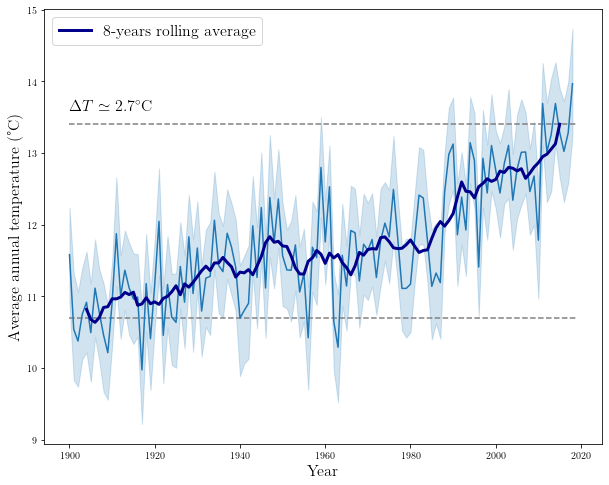

In [293]:
df_avg_yr = df_paris.groupby('year').mean()
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x="year", y="t_moy",
             data=df_paris,
             palette='RdBu'
            )
ax.plot(df_avg_yr.index, 
         df_avg_yr.t_moy.rolling(window=8, center=True).mean(),
         color='darkblue',
         linewidth=3,
         linestyle='-',
         marker='',
         label='8-years rolling average'
        )
plt.hlines(y=10.7, xmin=1900, xmax=2019, colors='gray', linestyles='dashed')
plt.hlines(y=13.4, xmin=1900, xmax=2019, colors='gray', linestyles='dashed')
ax.text(1900,13.6,r'$\Delta T\simeq 2.7^\circ$C', fontsize=16)
ax.set_ylabel("Average annual temperature (°C)", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show()

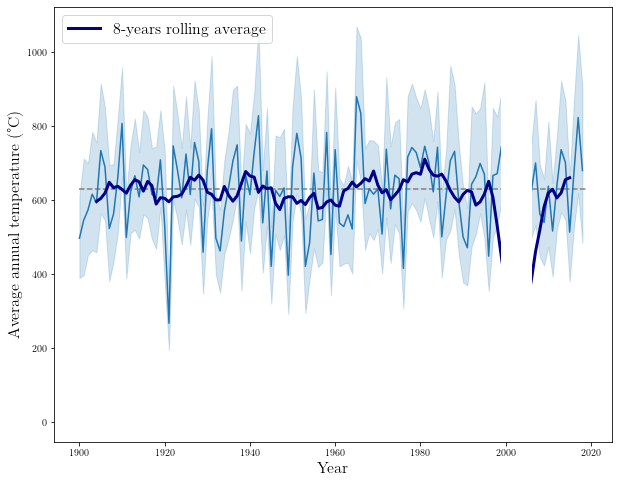

In [426]:
df_avg_yr = df_paris.groupby('year').mean()
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x="year", y="rain",
             data=df_paris.assign(rain = lambda x : 365*x['rain']),
             palette='RdBu'
            )
ax.plot(df_avg_yr.index, 
         df_avg_yr.assign(rain = lambda x : 365*x['rain']).rain.rolling(window=8, center=True).mean(),
         color='darkblue',
         linewidth=3,
         linestyle='-',
         marker='',
         label='8-years rolling average'
        )
plt.hlines(y=630, xmin=1900, xmax=2019, colors='gray', linestyles='dashed')

ax.set_ylabel("Average annual temperature (°C)", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
plt.legend(loc='upper left', fontsize=16)

rect = patches.Rectangle((1999,0),7,1000,fill=True,color='w',zorder=5)
ax.add_patch(rect)

plt.show()

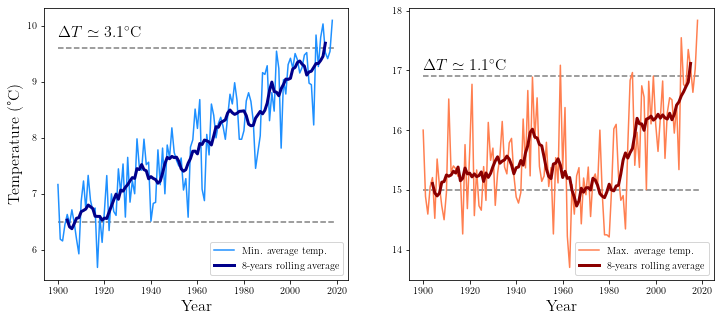

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(df_avg_yr.index, 
         df_avg_yr.t_min,
         color='dodgerblue',
         linewidth=1.5,
         linestyle='-',
         marker='',
         label='Min. average temp.'
        )
ax1.plot(df_avg_yr.index, 
         df_avg_yr.t_min.rolling(window=8, center=True).mean(),
         color='darkblue',
         linewidth=3,
         linestyle='-',
         marker='',
         label='8-years rolling average'
        )
ax1.hlines(y=6.5, xmin=1900, xmax=2019, colors='gray', linestyles='dashed')
ax1.hlines(y=9.6, xmin=1900, xmax=2019, colors='gray', linestyles='dashed')
ax1.text(1900,9.8,r'$\Delta T\simeq 3.1^\circ$C', fontsize=16)
ax1.legend(loc='lower right')
ax2.plot(df_avg_yr.index, 
         df_avg_yr.t_max,
         color='coral',
         linewidth=1.5,
         linestyle='-',
         marker='',
         label='Max. average temp.'
        )
ax2.plot(df_avg_yr.index, 
         df_avg_yr.t_max.rolling(window=8, center=True).mean(),
         color='darkred',
         linewidth=3,
         linestyle='-',
         marker='',
         label='8-years rolling average'
        )
ax2.hlines(y=15, xmin=1900, xmax=2019, colors='gray', linestyles='dashed')
ax2.hlines(y=16.9, xmin=1900, xmax=2019, colors='gray', linestyles='dashed')
ax2.text(1900,17,r'$\Delta T\simeq 1.1^\circ$C', fontsize=16)
ax2.legend(loc='lower right')
ax1.set_ylabel("Temperature (°C)", fontsize=16)
ax1.set_xlabel("Year", fontsize=16)
ax2.set_xlabel("Year", fontsize=16)
plt.show()

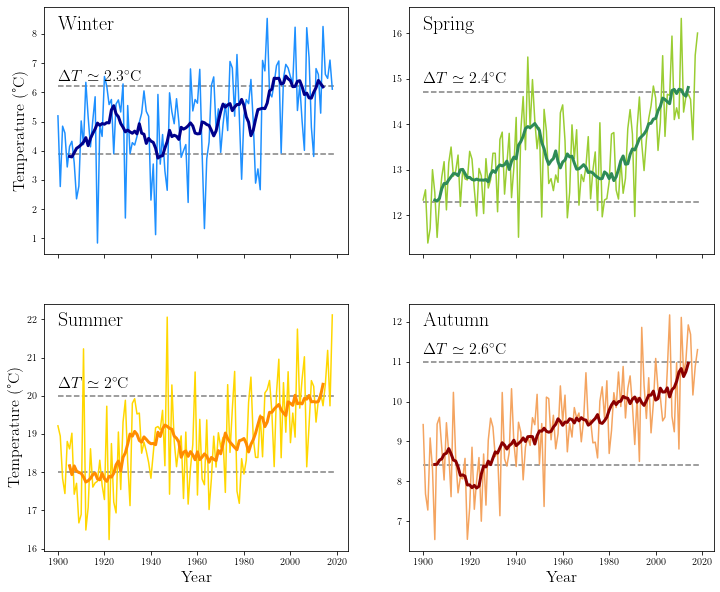

In [269]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True)
axs = axs.ravel()
params = {'season':['winter', 'spring', 'summer', 'autumn'],
          'color':['dodgerblue', 'yellowgreen', 'gold', 'sandybrown'],
          'color_rolling':['darkblue', 'seagreen', 'darkorange', 'darkred'],
          'label':['Winter', 'Spring', 'Summer', 'Autumn'],
          'tmin':[3.9, 12.3, 18, 8.4],
          'tmax':[6.2, 14.7, 20, 11]
         }
for i in range(4):
    data = df_paris[df_paris['season']==params['season'][i]].groupby('year').mean()
    axs[i].plot(data.index, 
                data.t_moy,
                color=params['color'][i],
                linewidth=1.5,
        )
    axs[i].plot(data.index, 
                data.t_moy.rolling(window=10, center=True).mean(),
                color=params['color_rolling'][i],
                linewidth=3,
        )
    axs[i].hlines(y=params['tmin'][i], xmin=1900, xmax=2019, colors='gray', linestyles='dashed')
    axs[i].hlines(y=params['tmax'][i], xmin=1900, xmax=2019, colors='gray', linestyles='dashed')
    axs[i].text(1900,params['tmax'][i]+0.2,
                r'$\Delta T\simeq {0}^\circ$C'.format(round(params['tmax'][i] - params['tmin'][i],2)),
                fontsize=16)
    axs[i].text(1900,0.95*(data.t_moy.max() - data.t_moy.min()) + data.t_moy.min(), params['label'][i],fontsize=20)
axs[0].set_ylabel("Temperature (°C)", fontsize=16)
axs[2].set_ylabel("Temperature (°C)", fontsize=16)
axs[2].set_xlabel("Year", fontsize=16)
axs[3].set_xlabel("Year", fontsize=16)
plt.show()

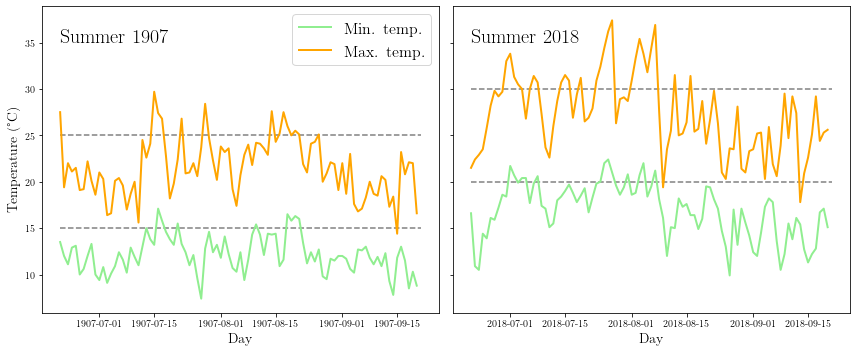

In [470]:
random_yr = np.random.randint(1900,1920)
df_summer1900s = df_paris[(df_paris['year']==random_yr) & (df_paris['season']=='summer')]
df_summer2019 = df_paris[(df_paris['year']==2018) & (df_paris['season']=='summer')]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax1.plot(df_summer1900s.index, df_summer1910.t_min, color='lightgreen', linewidth=2,label='Min. temp.')
ax2.plot(df_summer2019.index, df_summer2019.t_min, color='lightgreen', linewidth=2,label='Min. temp.')
ax1.plot(df_summer1900s.index, df_summer1910.t_max, color='orange', linewidth=2,label='Max. temp.')
ax2.plot(df_summer2019.index, df_summer2019.t_max, color='orange', linewidth=2,label='Max. temp.')
ax1.set_ylabel('Temperature (°C)', fontsize=14)
ax1.set_xlabel("Day", fontsize=14)
ax2.set_ylabel("", fontsize=14)
ax2.set_xlabel("Day", fontsize=14)
plt.tight_layout(h_pad=2)
ax1.text(datetime.date(random_yr, 6, 21),35,'Summer '+str(random_yr), fontsize=20)
ax2.text(datetime.date(2018, 6, 21),35, 'Summer '+str(2018), fontsize=20)
ax1.hlines(y=15, xmin=datetime.date(random_yr, 6, 21), xmax=datetime.date(random_yr, 9, 21), colors='gray', linestyles='dashed')
ax1.hlines(y=25, xmin=datetime.date(random_yr, 6, 21), xmax=datetime.date(random_yr, 9, 21), colors='gray', linestyles='dashed')
ax2.hlines(y=20, xmin=datetime.date(2018, 6, 21), xmax=datetime.date(2018, 9, 21), colors='gray', linestyles='dashed')
ax2.hlines(y=30, xmin=datetime.date(2018, 6, 21), xmax=datetime.date(2018, 9, 21), colors='gray', linestyles='dashed')
ax1.legend(loc='upper right', fontsize=16)
plt.show()

(0, 30)

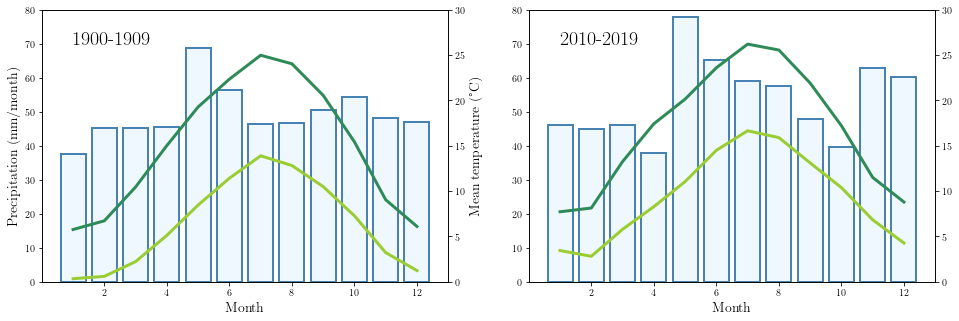

In [391]:
df_1900s = df_paris[(df_paris['decade']==1900)].assign(rain = lambda x : 30*x['rain']).groupby('month').mean()
df_2010s = df_paris[(df_paris['decade']==2010)].assign(rain = lambda x : 30*x['rain']).groupby('month').mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.bar(df_1900s.index, df_1900s.rain, color='aliceblue', linewidth=2,label='Min. temp.', edgecolor='steelblue')
ax1.set_ylim([0,80])
ax1.set_ylabel('Precipitation (mm/month)', fontsize=14)
ax1.set_xlabel("Month", fontsize=14)
ax1.text(1,70, '1900-1909', fontsize=20)

ax2.bar(df_2010s.index, df_2010s.rain, color='aliceblue', linewidth=2,label='Min. temp.', edgecolor='steelblue')
ax2.set_ylim([0,80])
ax2.set_xlabel("Month", fontsize=14)
ax2.text(1,70, '2010-2019', fontsize=20)

ax3 = ax1.twinx()
ax3.plot(df_1900s.index, df_1900s.t_min, color='yellowgreen', linewidth=3,label='Min. temp.')
ax3.plot(df_1900s.index, df_1900s.t_max, color='seagreen', linewidth=3,label='Min. temp.')
ax3.set_ylim([0,30])
ax3.set_ylabel('Mean temperature (°C)', fontsize=14)

ax4 = ax2.twinx()
ax4.plot(df_2010s.index, df_2010s.t_min, color='yellowgreen', linewidth=3,label='Min. temp.')
ax4.plot(df_2010s.index, df_2010s.t_max, color='seagreen', linewidth=3,label='Min. temp.')
ax4.set_ylim([0,30])

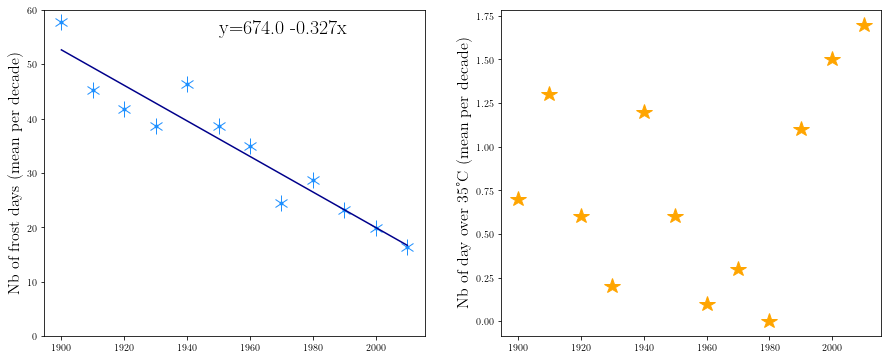

In [556]:
list_frost = []
list_hot = []
for dec in df_paris.decade.unique():
    list_frost.append(len(df_paris[(df_paris['decade']==dec) & (df_paris['t_min']<=0)])/10)
    list_hot.append(len(df_paris[(df_paris['decade']==dec) & (df_paris['t_max']>=35)])/10)

x = np.array(df_paris.decade.unique())
y = np.array(list_frost)
p, res, rnk, s = sp.linalg.lstsq(x[:, np.newaxis]**[0, 1], y)
        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.plot(df_paris.decade.unique(), list_frost, color='dodgerblue', marker='1', markersize=16, linestyle='')
ax1.plot(df_paris.decade.unique(), list_frost, color='dodgerblue', marker='2', markersize=16, linestyle='')
ax1.plot(df_paris.decade.unique(), list_frost, color='dodgerblue', marker='o', markersize=3, linestyle='')
ax1.plot(x, p[0] + p[1]*x, linewidth=1.5, color='darkblue')
ax1.text(1950,0.95*(y.max() - y.min()) + y.min(), 'y={0} {1}x'.format(round(p[0],0), round(p[1],3)), fontsize=20)
ax1.set_ylim([0,60])
ax1.set_ylabel(r"Nb of frost days (mean per decade)", fontsize=16)
ax2.plot(df_paris.decade.unique(), list_hot, color='orange', marker='*', markersize=16, linestyle='')
ax2.set_ylabel(r"Nb of day over 35°C (mean per decade)", fontsize=16)

#ax.set_ylabel("Average annual temperature (°C)", fontsize=16)
#ax.set_xlabel("Year", fontsize=16)

plt.show()

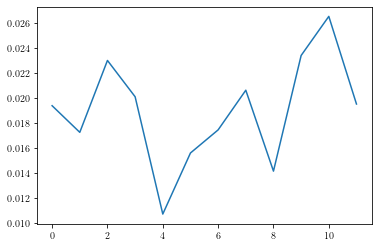

In [536]:
dt = []
for i in range(12):
    
    data = df_paris[df_paris['month']==i+1].groupby('decade').mean()
    x = np.array(data.index)
    y = np.array(data.t_moy)
    p, res, rnk, s = sp.linalg.lstsq(x[:, np.newaxis]**[0, 1], y)
    dt.append(p[1])
plt.figure()
plt.plot(range(12),dt)
plt.show()

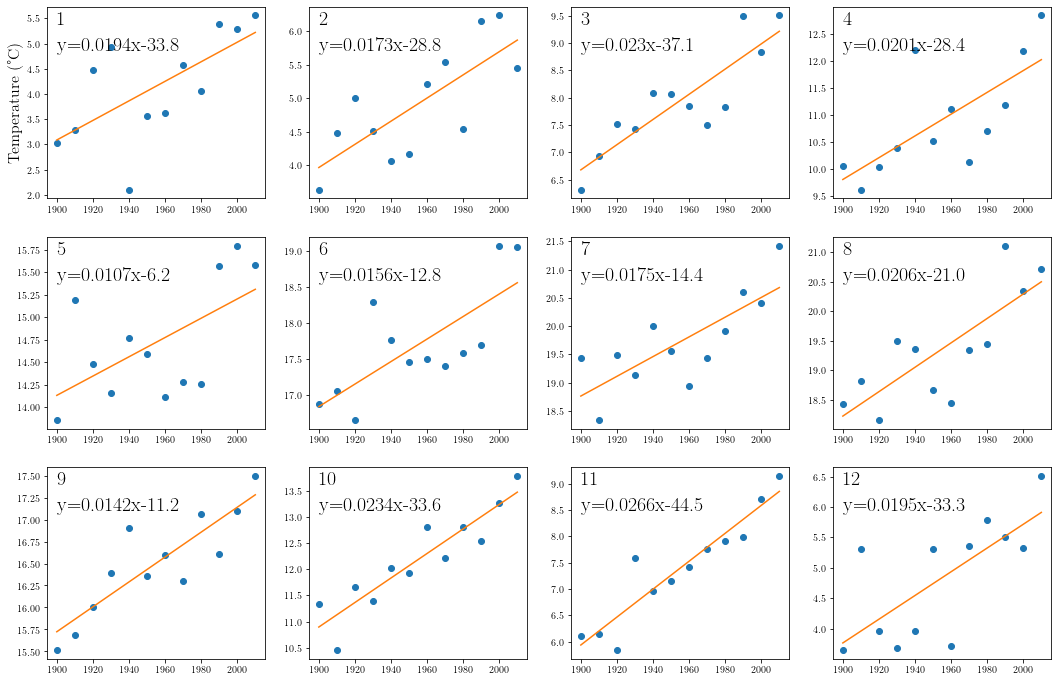

In [529]:
fig, axs = plt.subplots(3, 4, figsize=(18, 12))
axs = axs.ravel()

for i in range(12):
    
    data = df_paris[df_paris['month']==i+1].groupby('decade').mean()
    x = np.array(data.index)
    y = np.array(data.t_moy)
    p, res, rnk, s = sp.linalg.lstsq(x[:, np.newaxis]**[0, 1], y)
    
    axs[i].plot(data.index, data.t_moy, 'o')
    axs[i].plot(x, p[0] + p[1]*x, linewidth=1.5)
    #axs[i].hlines(y=params['tmin'][i], xmin=1900, xmax=2019, colors='gray', linestyles='dashed')
    #axs[i].hlines(y=params['tmax'][i], xmin=1900, xmax=2019, colors='gray', linestyles='dashed')
    axs[i].text(1900,0.95*(data.t_moy.max() - data.t_moy.min()) + data.t_moy.min(), i+1, fontsize=20)
    axs[i].text(1900,0.8*(data.t_moy.max() - data.t_moy.min()) + data.t_moy.min(),'y={0}x{1}'.format(round(p[1],4), round(p[0],1)),fontsize=20)
axs[0].set_ylabel("Temperature (°C)", fontsize=16)
#axs[2].set_ylabel("Temperature (°C)", fontsize=16)
#axs[2].set_xlabel("Year", fontsize=16)
#axs[3].set_xlabel("Year", fontsize=16)
plt.show()

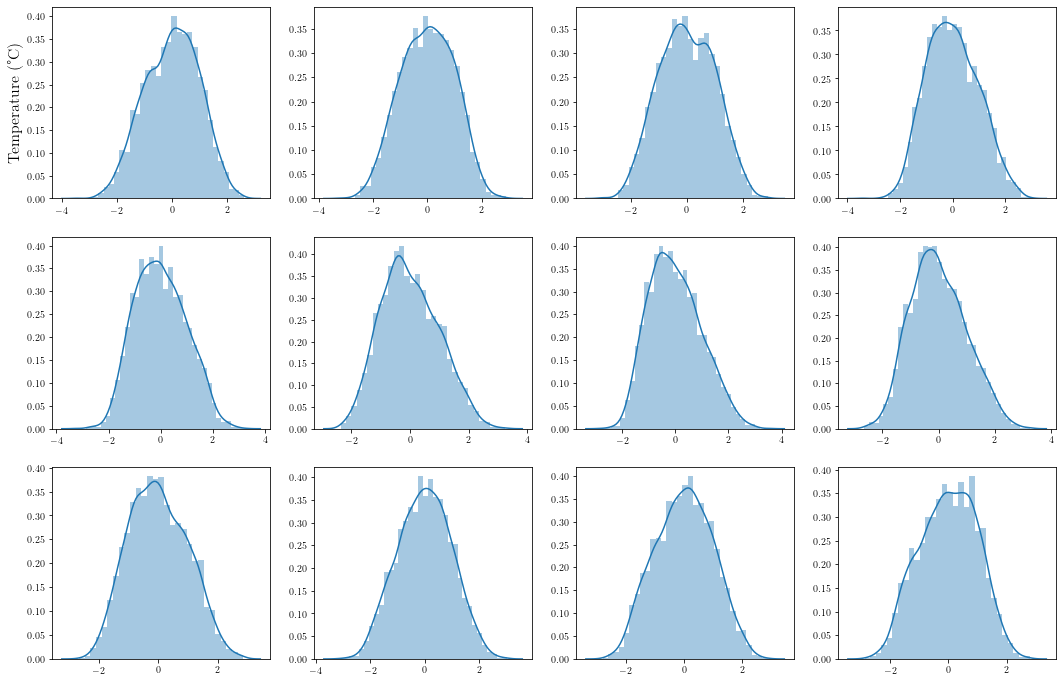

In [616]:
fig, axs = plt.subplots(3, 4, figsize=(18, 12))
axs = axs.ravel()

for i in range(12):
    
    data = df_paris[df_paris['month']==i+1]
    moy = data.groupby('year').mean().t_moy
    std = data.groupby('year').std().t_moy
    
    sns.distplot((data.t_moy - data['year'].apply(lambda x : moy[x]))/data['year'].apply(lambda x : std[x]), ax=axs[i])
    #axs[i].hlines(y=params['tmin'][i], xmin=1900, xmax=2019, colors='gray', linestyles='dashed')
    #axs[i].hlines(y=params['tmax'][i], xmin=1900, xmax=2019, colors='gray', linestyles='dashed')
    #axs[i].text(1900,0.95*(data.t_moy.max() - data.t_moy.min()) + data.t_moy.min(), i+1, fontsize=20)
    #axs[i].text(1900,0.8*(data.t_moy.max() - data.t_moy.min()) + data.t_moy.min(),'y={0}x{1}'.format(round(p[1],4), round(p[0],1)),fontsize=20)
axs[0].set_ylabel("Temperature (°C)", fontsize=16)
#axs[2].set_ylabel("Temperature (°C)", fontsize=16)
#axs[2].set_xlabel("Year", fontsize=16)
#axs[3].set_xlabel("Year", fontsize=16)
plt.show()



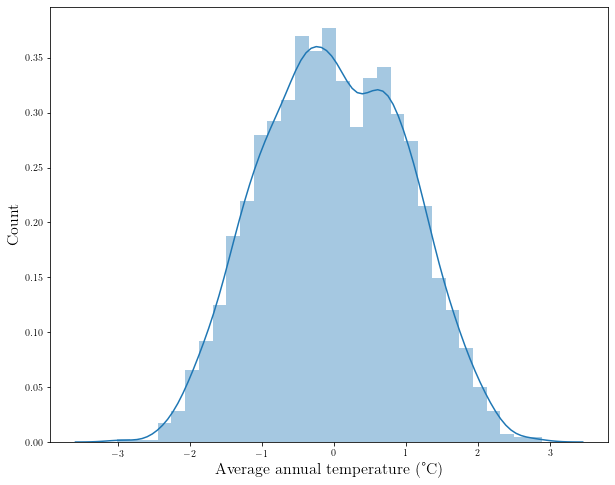

In [625]:
df_june = df_paris[df_paris['month']==3]
sr_t_moy = df_june.groupby('year').mean().t_moy
sr_t_std = df_june.groupby('year').std().t_moy

fig, ax = plt.subplots(figsize=(10,8))
sns.distplot((df_june['t_moy'] - df_june['year'].apply(lambda x : sr_t_moy[x]))/df_june['year'].apply(lambda x : sr_t_std[x]))
#sns.distplot(df_june['t_moy'])
ax.set_xlabel("Average annual temperature (°C)", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
plt.show()

In [585]:
sr_t_moy = df_paris.groupby('year').mean().t_moy
df_paris['t_moy'] - df_paris['year'].apply(lambda x : sr_t_moy[x])

date
1900-01-01    -4.283014
1900-01-02    -1.633014
1900-01-03    -3.933014
1900-01-04    -4.433014
1900-01-05    -7.483014
                ...    
2018-12-27   -14.218194
2018-12-28   -12.968194
2018-12-29    -9.068194
2018-12-30    -5.718194
2018-12-31    -4.768194
Length: 43277, dtype: float64

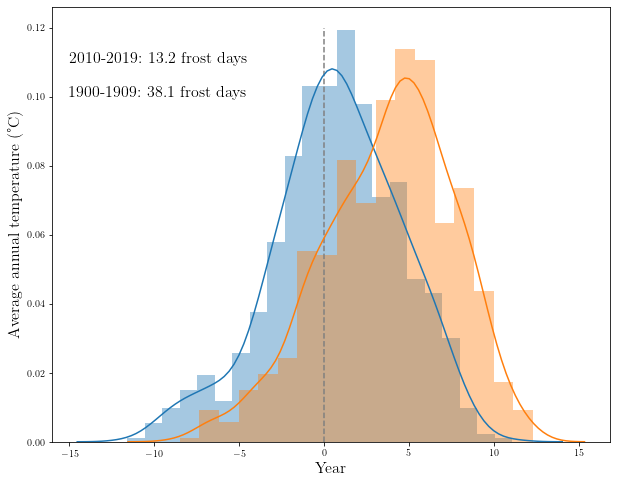

In [464]:
nb_ice1900s = len(df_paris[(df_paris['season']=='winter') & (df_paris['decade']==1900) & (df_paris['t_min']<=0)])/10
nb_ice2010s = len(df_paris[(df_paris['season']=='winter') & (df_paris['decade']==2010) & (df_paris['t_min']<=0)])/10

fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df_paris[(df_paris['season']=='winter') & (df_paris['decade']==1900)].t_min, hist=True, rug=False, kde=True);
sns.distplot(df_paris[(df_paris['season']=='winter') & (df_paris['decade']==2010)].t_min, hist=True, rug=False, kde=True);
ax.set_ylabel("Average annual temperature (°C)", fontsize=16)
ax.set_xlabel("Year", fontsize=16)
ax.text(-15,0.1,'1900-1909: {} frost days'.format(nb_ice1900s), fontsize=16)
ax.text(-15,0.11,'2010-2019: {} frost days'.format(nb_ice2010s), fontsize=16)
ax.vlines(x=0, ymin=0, ymax=0.12, colors='gray', linestyles='dashed')
plt.show()

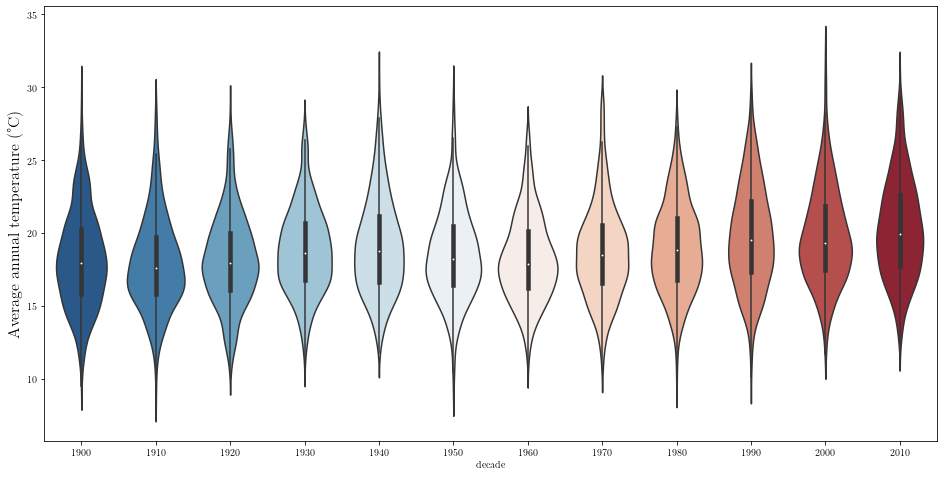

In [178]:
fig, ax = plt.subplots(figsize=(16,8))
sns.violinplot(x="decade", y="t_moy",
             data=df_paris[df_paris['season']=='summer'],
             palette='RdBu_r', fliersize=0
            )
ax.set_ylabel("Average annual temperature (°C)", fontsize=16)
plt.show()

In [403]:
len(df_witner_1900)

381

In [420]:
df_paris.decade.unique()

array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000,
       2010])

In [40]:
t_moy_year = df_paris.groupby('year').mean().t_min
len(t_moy_year.rolling(window=15).mean().iloc[15-1:].values)

105

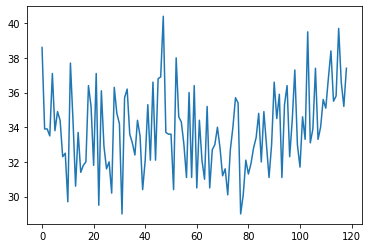

In [111]:
plt.figure()
#plt.plot(moving_average(df_data.loc[df_data['season']=='winter'].groupby('year').mean().t_moy.values,n=15))
#plt.plot(moving_average(df_data.loc[df_data['season']=='spring'].groupby('year').mean().t_moy.values,n=15))
#plt.plot(moving_average(df_data.loc[df_data['season']=='summer'].groupby('year').mean().t_moy.values,n=15))
plt.plot(moving_average(df_data.loc[df_data['season']=='summer'].groupby('year').max().t_max.values,n=1))
plt.show()

In [123]:
df_year

,month,day,t_min,t_max,rain,decade,t_moy
year,,,,,,,
1900,7.663043,15.836957,13.529348,24.896739,1.123913,1900.0,19.213043
1901,7.663043,15.836957,13.311957,24.576087,1.691304,1900.0,18.944022
1902,7.663043,15.836957,12.363043,23.310870,1.222826,1900.0,17.836957
1903,7.663043,15.836957,12.020652,22.859783,2.118478,1900.0,17.440217
1904,7.663043,15.836957,13.004348,24.604348,1.681522,1900.0,18.804348
...,...,...,...,...,...,...,...
2014,7.663043,15.836957,15.246739,24.230435,2.459783,2010.0,19.738587
2015,7.709302,16.627907,15.391860,25.196512,1.906977,2010.0,20.294186
2016,7.663043,15.836957,16.482609,25.894565,0.781522,2010.0,21.188587


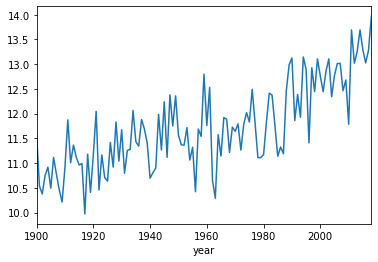

In [112]:
df_data.groupby('year').mean().t_moy.plot()

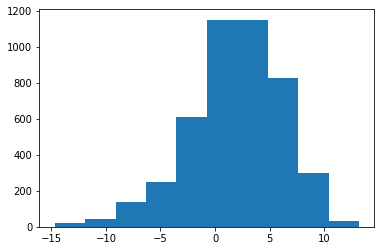

In [134]:
plt.figure()
plt.hist(df_data.loc[(df_data['season']=='winter') & (df_data['decade'].between(1930,1970))].t_min)
plt.show()

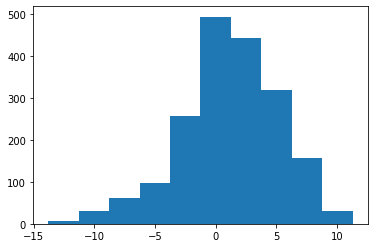

In [57]:
plt.figure()
plt.hist(df_data.loc[(df_data['season']=='winter') & (df_data['year'].between(1900,1920))].t_min)
plt.show()

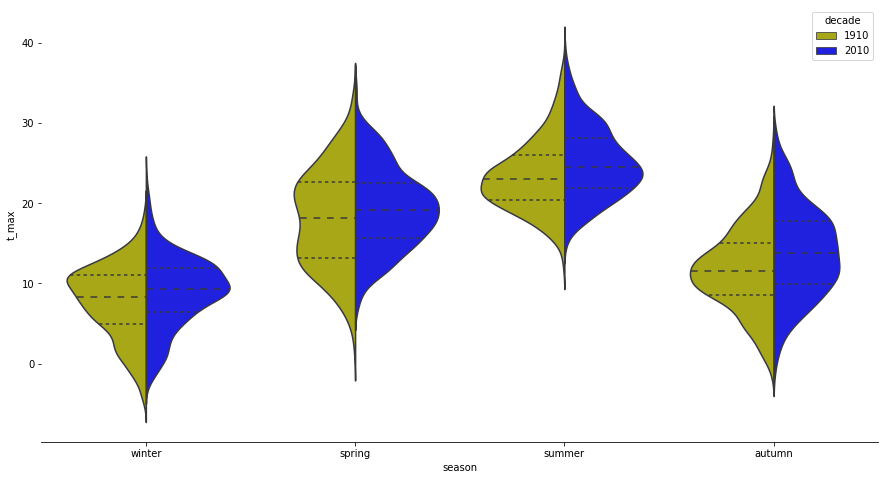

In [166]:

plt.figure(figsize=(15,8))
sns.violinplot(x="season", y="t_max", hue="decade",
               split=True, inner="quart",
               palette={1910: "y", 2010: "b"},
               data=df_data[(df_data['decade']==1910) | (df_data['decade']==2010)])
sns.despine(left=True)


In [143]:
df_data[(df_data['decade']==1900) | (df_data['decade']==1920)]

,year,month,day,t_min,t_max,rain,season,decade,t_moy
date,,,,,,,,,
1900-01-01,1900,1,1,4.5,10.1,0.0,winter,1900,7.30
1900-01-02,1900,1,2,7.9,12.0,7.5,winter,1900,9.95
1900-01-03,1900,1,3,6.0,9.3,2.2,winter,1900,7.65
1900-01-04,1900,1,4,6.0,8.3,3.1,winter,1900,7.15
1900-01-05,1900,1,5,2.2,6.0,0.0,winter,1900,4.10
...,...,...,...,...,...,...,...,...,...
1929-12-27,1929,12,27,1.9,10.1,3.6,winter,1920,6.00
1929-12-28,1929,12,28,5.0,11.7,9.5,winter,1920,8.35
1929-12-29,1929,12,29,6.5,12.6,0.2,winter,1920,9.55
